<div style="display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Kaggle 5th Annual Survey</h1>
</div>

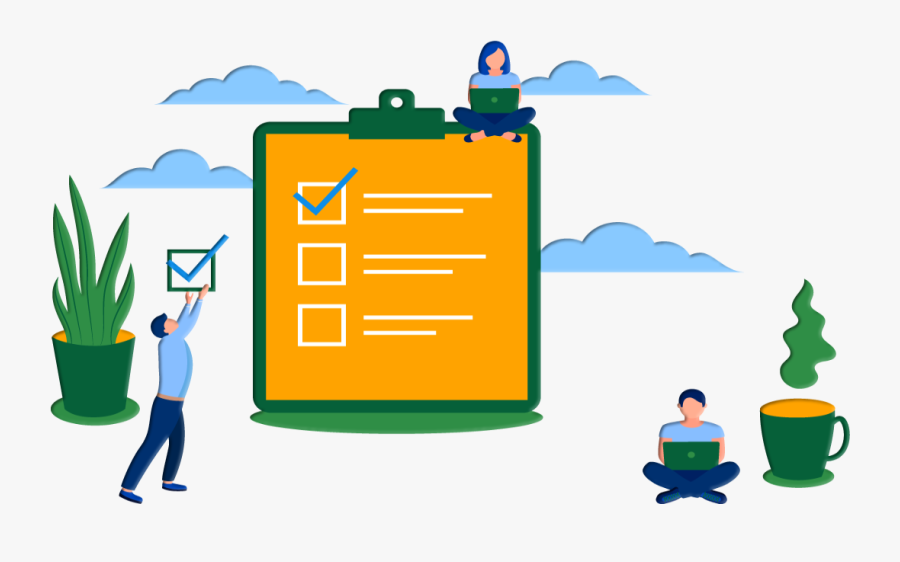

Tell me what you like in my analysis if exists and don't forget to upvote if you like it, **if you have any advice let me know**.

> # Introduction

*Some details:*
- *Every year Kaggle conducts a survey about Data Science and Machine Learning.*
- This is the fifth Kaggle survey.
-  Survey received 25,973 usable responses from participants in 171 different countries and territories.
- The survey contains 42 Questions.
- There are questions that you must choose one answer, those have one column.
- There are questions that you can choose multiple answers, those have n-columns such that n is the number of choices.

We will speak here about:

- Personal Details and Preferences
- Skills
- Employment
- Storage / Clouds / Big Data
- Tools

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd
import random

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data
survey = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
survey.head()

The Structure of the data:

In [ ]:
print('Number of rows:', survey.shape[0])
print('Number of columns:', survey.shape[1])

The time spent to finish this survey distribution.

In [ ]:
survey.loc[1:, 'Time from Start to Finish (seconds)'] = survey.loc[1:, 'Time from Start to Finish (seconds)'].astype(int)
bins = np.arange(150, 2000+20, 20)
plt.hist(survey.loc[1:, 'Time from Start to Finish (seconds)'], bins=bins)
plt.xlim([150, 2000])
plt.show()

So as we can see the most of the Data Scientists took about 3m to 8m, So they focused in their answers and this is a good information because that mean we've a real data we can believe in its results.

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">About the Data Scientists (personal details)</h1>
</div>


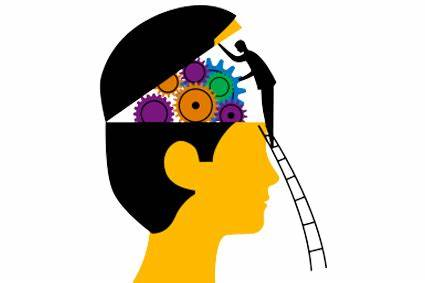

Points of interest:

- Age
- Gender
- Country
- Education
- Other small points

We will put here the analysis of 7 questions:

Q1, Q2, Q3, Q4, Q39, Q40 and Q42

# Age

In [ ]:
plt.subplots(figsize=(8, 5))
base_color = sns.color_palette()[1]
sns.countplot(data=survey, x='Q1', color=base_color,
             order=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])

plt.xlabel('Age Range')
plt.title('Age Ranges Distribution')
plt.show()

It seems that we have three important points:

- Most of the Data Scientists are youth or at least not old people in the range of [18, 29].
- We have a considerable amount of old people (most experts) that contribute in the industry. [30+]
- There are some Data Scientists (1500+) above 50 years and they still contribute not only in their job but in surveys. that means there are a lot of these category in the industry and it's a considerable amount. [50+]

In [ ]:
# To know the count of each range
counts = survey['Q1'].value_counts()[:-1] # [:-1] to exclude the one for the question itself
ranges = counts.index
values = counts.values
value_to_range = {Range:value for Range, value in zip(ranges, values)}

# To divide it into two divisions
youth = ['18-21', '22-24', '25-29', '30-34']
youth_sum = sum([value_to_range[youth_range] for youth_range in youth])
old = ['35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+']
old_sum = sum([value_to_range[old_range] for old_range in old])

# Plot a Pie Chart
sizes = [old_sum, youth_sum]
labels = ['Old', 'Youth']
explode = [0.1, 0] # to cut it as you see
plt.pie(sizes, labels=labels,
        colors= ['#cd853f', 'lightGreen'],
        explode=explode,
        autopct='%1.1f%%')

plt.show()

that gives us additional important point:

- 69.2% of the Data Scientists are in the this range [18, 34]


**Last thing to put in consideration and I think it maybe useful:**

- The number of Data Scientists in range [18, 21] is very huge maybe because there are DS who are less than 18, but because there is no option of <18 they choose to be in that range.

- the number of whole Youth might be very large because youth need to prove their existence in the industry, so they are actively on communities, but in the other hand old people (most of them) have already proved their existence and got their jobs, so they are not very intersted in contribute in the industry itself (as they are work for their company instead)

So the data might refer to the DS actively contribut in the communities are 'something' not whole Data Scientists are.

# Gender

In [ ]:
# To order them from largest to smallest
counts = survey['Q2'].value_counts()[:-1]  # [:-1] to exclude the one for the question itself
whole_number = sum(counts.values)
counts = 100*counts / whole_number
counts = counts[::-1]

base_color = sns.color_palette()[5]
plt.barh(counts.index, counts.values, color=base_color)
plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('The distribution of Gender')
plt.show()

**Most important points:**

- Men has the largest number of counts about 79.3%.
- On the other hand, women has 18.8%.
- Other genders haven't a considerable effect so we will ignore them.

# Country or Region

In [ ]:
# To order them from largest to smallest
counts = survey['Q3'].value_counts()[:-1]  # [:-1] to exclude the one for the question itself
whole_number = sum(counts.values)
counts = 100*counts / whole_number

# we will put all countries with less than 2% percentage in 'Other' bar
cut_idx = 0
for idx in range(len(counts)):
    if counts[idx] < 2:
        cut_idx = idx
        break

# Adding Other to our countries as one category
other = sum(counts[cut_idx:])
other = pd.Series(other)
counts = counts[:cut_idx]
counts.append(other)
counts = counts[::-1]

# Plot it
base_color = '#4DC3FF'
plt.barh(counts.index, counts.values, color=base_color)
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('The distribution of countries')
plt.show()

*Some one after looking at this graph will say ok they are like that because India has a huge population! (1,352,642,280)
But if we assume that's right then why China (1,439,323,776 population) didn't become like it or even close to it.*

So we can say that Indians really contribute and made an incridible efforts in this industry
then America and other countries listed above.

# But wait I see that this criteria is not fair!

Why I'm saying that?
I'm saying that because if we want to know which country have the largest number of people interested in Data Science we must do new variable equals --> the number of people counts here divided by the population of that country.
that seems very smart and fair I see.

I will make that only for the top countries above to save time if you are interested in that do it for whole countries to see more and more accurate results.

In [ ]:
# To remove other from our new comparison
counts.drop('Other', axis=0, inplace=True)
# we want to make counts as it is really from the survey
counts = pd.Series((counts.values / 100) * whole_number, index=counts.index)

# Let's start calculation the rate of contribution
populations = [207774520, 64000000, 212000000, 145872256, 214347882, 1439323776, 125620000, 332775543, 1352642280]
country_population = {country:population for country, population in zip(counts.index, populations)}

cont_rates = pd.Series([100*country_contributers / country_population[country] for country, country_contributers in zip(counts.index, counts.values)])
counts = pd.Series(cont_rates.values, index=counts.index)
counts = counts.sort_values()

# Plot it
base_color = '#a52a2a'
plt.barh(counts.index, counts.values, color=base_color)
plt.xlabel('Rate')
plt.ylabel('Country')
plt.title('The distribution of Country')
plt.show()

What a surprise?!
After doing the real graph we saw that Indian people aren't more likely to be Data Scientist.

So from the previous study we knew that the most people in the communty are from India, but the country with the largest rate of Data Scientist isn't India but The United Kingdom of Great Britain and Northern Ireland.

# Education

In [ ]:
def put_an_end_to_single_choice(Qn, choice_name, color, ordered=False, order=[]):

    counts = survey[Qn].value_counts()[:-1]  # [:-1] to exclude the one for the question itself
    whole_number = sum(counts.values)
    counts = 100*counts / whole_number

    # Plot it
    base_color = color
    if ordered:
        
        sns.barplot(data=survey, y=counts.index, x=counts.values,
                    color=base_color,
                    order=order)
    else:
        sns.barplot(data=survey, y=counts.index, x=counts.values,
                    color=base_color)

    plt.xlabel('Percentage')
    plt.ylabel(choice_name)
    plt.title('The distribution of {}'.format(choice_name))
    plt.show()
 



order = ['I prefer not to answer', 'No formal education past high school',
                "Some college/university study without earning a bachelor’s degree",
                "Bachelor’s degree", "Master’s degree", "Doctoral degree",
                'Professional doctorate']

put_an_end_to_single_choice('Q4', 'Degree', '#00FFFF', ordered=True, order=order)

The most important points here:

**- Master and Bachelor degrees are the most degrees exist with the Data Scientist.** (about 75% in total)

   - Note: I see that maybe happen because the majority of those people are youth and youth are willing to contribute with the communities more than anyone else and I said the cause above in the age part.
 
**- The least degree is the hardest one 'Professional doctorate'.** (about 2% in total)

   - Note: Actually, most of them are old and older people aren't willing to contribue with the community and that also explained above.

# Sharing Places

In [ ]:
def put_an_end_to_multiple_choice(Qn, color, choice_name, n=3, horizontal=True): # Qn is the the question with its number like Q39

    Qn_cols = list(filter(lambda x: x[:n] == Qn, survey.columns))
    d = {}
    for q in Qn_cols:

        choice_selected = survey.loc[ survey[q].notnull() , q].unique()[1].strip()  # [1] to take the name without the question
        d[q] = [survey[q].count() - 1, choice_selected]  # -1 to remove the one for the question itself


    choices = list()
    counts = list()
    for count, choice in list(d.values()):
        choices.append(choice)
        counts.append(count)

    # The dataframe to be plotted
    choices_with_counts = pd.DataFrame({'Choice':choices, 'count':counts}).sort_values(by='count', ascending=False)
    whole_number = sum(choices_with_counts['count'])
    choices_with_counts['count'] = 100*choices_with_counts['count'] / whole_number

    # Plot it
    base_color = color
    if horizontal:
        sns.barplot(data=survey, y=choices_with_counts['Choice'], x=choices_with_counts['count'],
                    color=base_color)
    else:
        sns.barplot(data=survey, x=choices_with_counts['Choice'], y=choices_with_counts['count'],
                    color=base_color)
    plt.xlabel('Percentage')
    plt.ylabel(choice_name)
    plt.title('Most {}s For Data Scientists'.format(choice_name))
    plt.show()
    
    
put_an_end_to_multiple_choice('Q39', '#7FFFD4', 'Sharing Place')

From the graph above we can say three important things:

- The most places to share work are GitHub, Kaggle and Colab
- We've a considerable amount of people that doesn't like to share their work
- Any places or choices other than the listed above are a tiny amount that doesn't deserve to pay attention. 

# Courses

In [ ]:
put_an_end_to_multiple_choice('Q40', '#006400', 'Courses Place')

Ooook, we've a fierce competition in courses places, but we can say:

- Half of the Data Scientist choose one of those (Coursera, Kaggle and Udemy), ie one of two DS choose one of those and this is a big ratio.
- Universities courses has 10% percent only.
- We can say that DS choose to learn remotely.

# Topics Places

In [ ]:
put_an_end_to_multiple_choice('Q42', '#966F33', 'Topics Place')

Most important points:

- 25% of Data Scientists choose to learn from Kaggle and this is a huge ratio
- 50% of Data Scientists choose to learn from Blogs, youtube or Kaggle.

**Note**: I think there is a small point maybe Kaggle is the most chosen platform because the survey itself was in Kaggle so ofcourse if someone was in Kaggle and do Kaggle annual survey that's mean he is active or somewhat active on Kaggle and that may increase the Kaggle ratio. (for example if we conduct the same survey in twitter that may increase Twitter ratio for the same reason) 

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Skills</h1>
</div>

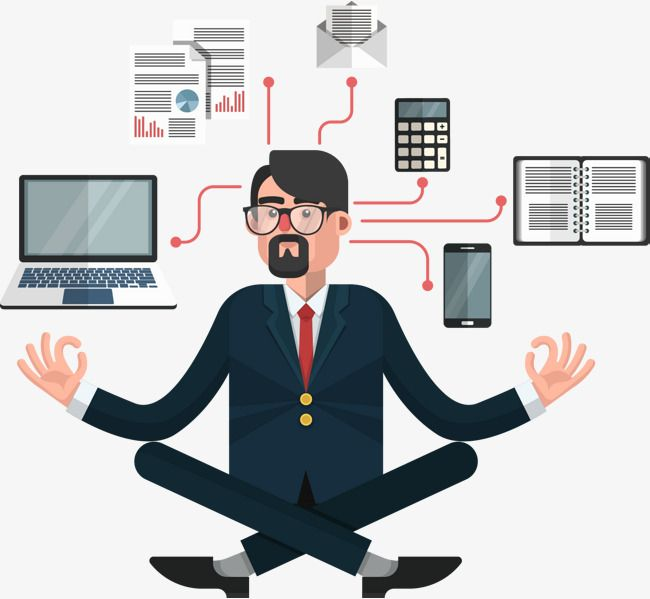

Here we will analyze these questions :
- Q6 Code writting
- Q7 Programming Language
- Q8 Recommended Programming Language for Data Science
- Q15 & Q17 ML Algorithms
- Q18 Computer Vision
- Q19 NLP methods

# Code Writting

In [ ]:
order = ['I have never written code', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
put_an_end_to_single_choice('Q6', 'Code writting', '#66CDAA', ordered=True, order=order)

I will discuss three important points:

1. The majority (about + 50% ) of the Data Scientists are in the range (some Months, 3 years).
2. There are some people contribute in the survey and they didn't know how to code I see that we must exclude their survey. (I'll do that in the next version)

**Note**: I see that the huge range in point one is because those group of people are more likely to actively contribute in the community because they want to improve their skills and profiles.

# Programming language used and recommended

In [ ]:
put_an_end_to_multiple_choice('Q7', '#033E3E', 'Programming Language', n=2)

In [ ]:
put_an_end_to_single_choice('Q8', 'Recommended Programming Language', '#3D0303')

- So python is the most recommended language for DS with +80%.
- R and SQL come after it with 10% percentage in total.
- Python also is the most used language with +30% SQL comes after it with +15%.
- R, C, C++, Java and Javascript are still used nowaday with 7% for each of the DS in survey and that's very strange.

that seems those people who use other than Python wants to use it and they recommend using it even they don't.

# ML Algorithms

In [ ]:
order = ['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
         '5-10 years', '10-20 years', '20 or more years']
put_an_end_to_single_choice('Q15', 'ML usage', '#793F3F', ordered=True, order=order)

In [ ]:
put_an_end_to_multiple_choice('Q17', '#3E7878', 'ML Algorithm')

From the first graph:

- There are 15% of the Data Scientists don't use ML algorithms, that means they aren't data scientists they maybe beginners or data analysts I will exclude them in the next version

- 37% use ML algorithms under one year that mean most of the data scientists here (+50%) are either beginners or Data analysts, so we want to do more analysis to filter them.

- 72% of the Data Scientists use ML from few months to 2 years that mean most of the data scientists actually here are some what intermediate or beginners.

- 14% of the Data Scientists here use ML methods use ML 3+ years

From the second graph:

- 24% of the data scientists use classic ML models and this is a huge ratio and the cause of that is because as we say most of DS in the survey are beginners or intermediate.

- NN types and Bayesian Approches in total comes after the classical because the same cause we don't have a huge amount of experts or (non-beginners) and those are methods for those people.  

# Advanced Techniques

In [ ]:
put_an_end_to_multiple_choice('Q18', '#483E78', 'Computer Vision')

In [ ]:
put_an_end_to_multiple_choice('Q19', '#6E783E', 'NLP')

The huge percentage here of Nones happens because the same reason

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Employment Status</h1>
</div>

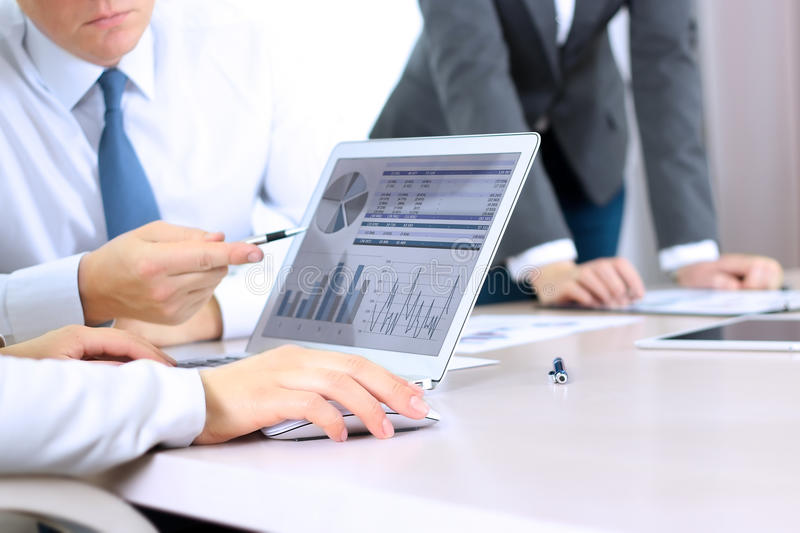

we will discuss:
- Q5 Role Name (Job Title)
- Q20 Employer's industry
- Q21 Company size
- Q22 People Work with
- Q23 ML Usage
- Q24 Important Parts in Work
- Q25, Q26 Money

# Job Title

In [ ]:
put_an_end_to_single_choice('Q5', 'Job Title', 'skyblue', ordered=False)

In [ ]:
def single_donut_chart(Qn, colors, explodes_list, title, figsize):

    counts = survey[Qn].value_counts()[:5]
    
    # Labels
    labels = counts.index

    # Numbers
    numbers = counts.values
    
    # size of the chart
    plt.subplots(figsize=figsize)
    
    # Pie Chart
    plt.pie(numbers, colors=colors, labels=labels,
            autopct='%1.1f%%', pctdistance=0.85,
            explode=explodes_list)

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title('{} Details'.format(title))

    # Displaing Chart
    plt.show()


In [ ]:
# colors
colors = ['#1cc7d0', '#ffc168', '#ff4f81', 
          '#3369e7', '#ff6a00']
# explosion
explode = [0]*5

single_donut_chart('Q5', colors, explode, 'Title', (7, 7))

So my expectation was true we've a lot of Data Analysts here

# Employer's industry

In [ ]:
# colors
colors = ['#ffc20e', '#007cc0', '#2dde98', 
          '#8ec06c', '#dbebfa']
# explosion
explode = [0]*5

single_donut_chart('Q20', colors, explode, 'Industry', (7, 7))

# Company Size

In [ ]:
# colors
colors = ['#109dc0', '#b5c327', '#f9e498', 
          '#a25016', '#f66733']
# explosion
explode = [0]*5

single_donut_chart('Q21', colors, explode, 'Company Size', (7, 7))

# People Work With

In [ ]:
put_an_end_to_single_choice('Q22', 'Coworkers', 'skyblue', ordered=True, order=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'])

So we've either a big tech company or very small company (0-4)

# ML Usage

In [ ]:
order = ['No (we do not use ML methods)', 'I do not know', 'We are exploring ML methods (and may one day put a model into production)',
         'We use ML methods for generating insights (but do not put working models into production)',
         'We recently started using ML methods (i.e., models in production for less than 2 years)',
         'We have well established ML methods (i.e., models in production for more than 2 years)']
put_an_end_to_single_choice('Q23', 'Coworkers', 'gray', ordered=True, order=order)

# Important Parts in Work

In [ ]:
put_an_end_to_multiple_choice('Q24', 'lightblue', 'Important Parts In Work')

# Money

In [ ]:
plt.subplots(figsize=(8, 8))
order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999',
         '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
         '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
         '250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000']

put_an_end_to_single_choice('Q25', 'Annual Salary', 'lightgreen', ordered=True, order=order)

quarter of us got 0-999 dollars annualy and I expect that because they doesn't work so they choose any range there is a zero in it.

In [ ]:
order=['$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '$100,000 or more ($USD)']
put_an_end_to_single_choice('Q26', 'ML Expenses', 'lightgreen', ordered=True, order=order)

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Tools</h1>
</div>

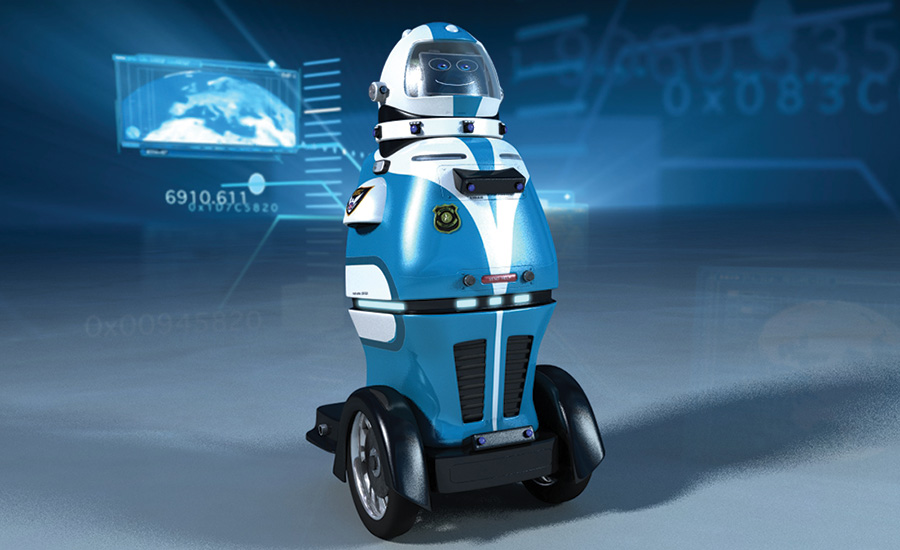

Here we will discuss:
- IDEs (Local & Hosted)
- Hardware Used & TF
- Libraries & Frameworks
- BI Usage

Coming soon

In [ ]:
sns.set_style('dark')
put_an_end_to_multiple_choice('Q9', 'lightblue', 'Local IDE', 2)
put_an_end_to_multiple_choice('Q10', 'blue', 'Hosted IDE')

# Hardware

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(8, 8))
put_an_end_to_single_choice('Q11', 'Machine', 'lightblue')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q12', 'skyblue', 'Hardware', horizontal=False)

Wow that's a surprising news half of the Data Scinetist don't use any of those ships

In [ ]:
sns.set_style('dark')
order= ['Never', 'Once', '2-5 times', '6-25 times', 'More than 25 times']
put_an_end_to_single_choice('Q13', 'TF Units Usage', '#b5c327', ordered=True, order=order)

Most of our Data Scientists don't use TF units

# Libraries

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q14', 'skyblue', 'Libraries')

# ML Frameworks

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q16', 'lightgreen', 'Frameworks')

# ML Product

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q31', 'purple', 'ML Product')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_single_choice('Q41', 'Work tool', 'orange')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q36', 'Green', 'Automated ML Tool General')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q37', 'lightgreen', 'Automated ML Tool Specific')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q38', 'lightgreen', 'Automated ML tool Experiments')

# BI tools

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q34', 'magenta', 'BI tool')

In [ ]:
sns.set_style('dark')
plt.subplots(figsize=(11, 11))
put_an_end_to_single_choice('Q35', 'BI tools', 'Yellow')

<div style="color:#D81F26;
           display:fill;
           border-radius:30px;
           border-style: solid;
           border-color:#C1C1C1;
           background-color:#373737;
           font-size:20px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="text-align: center;
               padding: 15px;
               color:#4DC3FF;">Big Data / Cloud</h1>
</div>

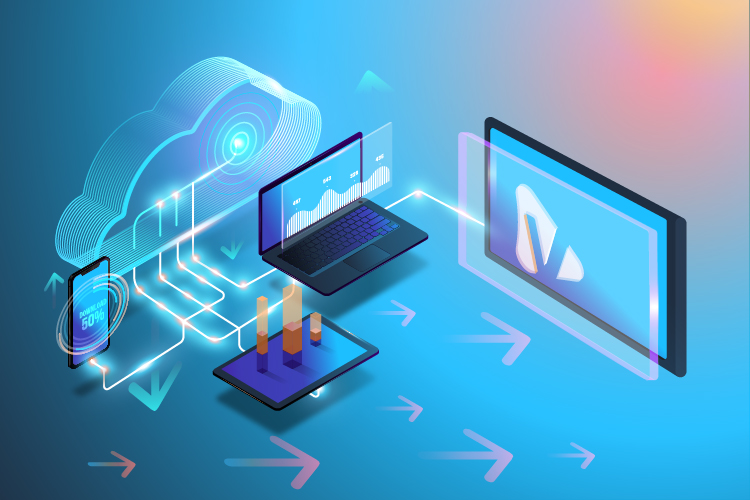

We will discuss:
- Clouds
- Big Data

# Cloud

In [ ]:
sns.set_style('white')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q27', 'Black', 'Cloud Computing')

In [ ]:
sns.set_style('white')
plt.subplots(figsize=(11, 11))
put_an_end_to_single_choice('Q28', 'Cloud Platform', 'Black')

In [ ]:
sns.set_style('white')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q29', 'Black', 'Cloud Product')

# Big Data

In [ ]:
sns.set_style('darkgrid')
# plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q30_A', 'yellow', 'Big Data Product', n=5)

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 11))
put_an_end_to_multiple_choice('Q32', 'yellow', 'Big Data Product')

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 11))
put_an_end_to_single_choice('Q33', 'Big Data Product', 'yellow')